<a href="https://colab.research.google.com/github/jerolg/Metodos_Computacionales_taller/blob/main/Tarea03_Solucion_ecuaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TALLER 03** 
##**Nombre**:Jeronimo López  **CC 1001735333**
__________________________________________________________

### Resolver los siguientes problemas, por el metodo de la biseccion, newton, punto fijo y secante, realizar una comparación del error como función del las numero de iteraciones 

Referencias: *Numerical Analysis Book by J. Douglas Faires and Richard L. Burden*




In [1]:
#@markdown **Libraries**
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import seaborn as sns
import pandas as pd

##**1.)** 

![Plano Inclinado](https://raw.githubusercontent.com/jerolg/Metodos_Computacionales_taller/main/book/images/ecuacion_1_variable/Fig0.png)

Una particula parte del reposo sobre un plano inclinado uniforme, cuyo ángulo 
$\theta$ cambia con una rapidez constante de : 

\begin{equation}
\frac{\mathrm{d}\theta}{\mathrm{d} t} = \omega < 0
\end{equation}

Al final de t segundos, la posición del objeto esta dada por: 


\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2} -\sin\omega t\right)
\end{equation}


Suponga que la partícula se desplazo 0.51m en 1s. Encuentre, con una exactitud de $10^{-5}$, la rapidez $\omega$ con que $\theta$ cambia. Suponga que $g=9.76m/s$

###**Solution**
for $x(t)=0.51,\ t=1$

**Bisection Method**

$\frac{0.51(2\omega^2)}{9.76}+\frac{e^{w}-e^{-w}}{2}-sin(\omega)=f(\omega)=0$ 

**Fixed Point**

$G(x)=\omega - x(t=1s) = \omega + \frac{g}{2\omega^2}( \frac{e^{\omega}-e^{-\omega}}{2}) -\frac{g}{2\omega^2}sin(w) $

**Newthon Raphson** - **Secant Method**

$x'(t=1s)=-\frac{g(e^{-\omega}+e^{\omega}-2cos(\omega))}{4\omega}$


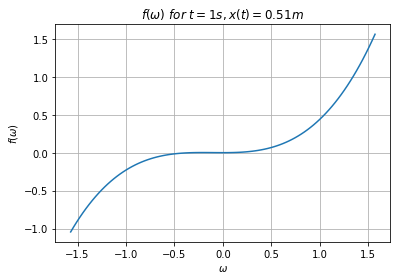

In [6]:
#f(x0,w,t0)
func = lambda x : -9.76/(2*x**2)*(((np.exp(x)-np.exp(-x))/2)-np.sin(x))
f = lambda u : (2*u**2*0.51)/9.76 - np.sin(u) + (np.exp(u)-np.exp(-u))/2
p = lambda z : z-f(z)
D1_f = lambda a : 0.5*(4.08*a/9.76+np.exp(-a)+np.exp(a)-2*np.cos(a))
w = np.linspace(-np.pi/2, np.pi/2,100)
n=10000
plt.plot(w, f(w))
plt.xlabel('$\omega$')
plt.ylabel('$f(\omega)$')
plt.title('$f(\omega) \\ for\\ t = 1s, x(t) = 0.51m$')
plt.grid()
plt.show()


In [7]:
#Bisection 
BM=optimize.bisect(f,-0.5,0.2,xtol=1E-5,maxiter=n)
#Fixed Point
FP=optimize.fixed_point(p,-0.5,xtol=1E-5,maxiter=n)
#Newton Secant
NS=optimize.newton(f, -0.5, maxiter=n, tol=1E-5)
#Newton Raphson
NR=optimize.newton(f, -0.5, fprime=D1_f, maxiter=n, tol=1E-5)
print(f'Bisection Method: {BM} \nFixed_Point: {FP} \nSecant Method: {NS} \nNewton - Raphson: {NR}')
err1=abs(FP-BM)
err2=abs(NS-NR)
print(f'''\n \nFor n=1000 iterations, the error in the root:
for Bisection & Fixed Point Method, exist an error the order of {err1}, \nSimilarly in the case of Newton- Raphson and Secant Methods
the relative error is {err2}''')


Bisection Method: -0.3135231018066406 
Fixed_Point: -0.3135209839265092 
Secant Method: -0.31352098925021976 
Newton - Raphson: -0.3135209839265542

 
For n=1000 iterations, the error in the root:
for Bisection & Fixed Point Method, exist an error the order of 2.1178801314358786e-06, 
Similarly in the case of Newton- Raphson and Secant Methods
the relative error is 5.3236655639388175e-09



--------------------------------------------------------
**R/:** La velocidad a la que varia el angulo $\theta$ es de $\frac{d \theta}{dt}= \omega \approx -0.31352 \frac{rad}{s}$



_____________________________________________________________________________

##**2.)** *(Realizado en clase)*

Determinar el ángulo del sector circular que es igual a un cuarto del área de la circunferencia

\begin{equation}
A = r^2 \frac{\theta}{2} - \frac{r^2}{2} \sin(\theta)
\end{equation}


\begin{equation}
\frac{\pi r^2}{4} = r^2 \frac{\theta}{2} - \frac{r^2}{2} \sin(\theta)
\end{equation}


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}



\begin{equation}
f(\theta) =\theta - \sin \theta - \frac{\pi}{2}=0
\end{equation}

In [13]:
f=lambda theta : theta-np.sin(theta)-np.pi/2
f_fp = lambda theta : theta - f(theta)
d_f = lambda theta : 1-np.cos(theta)
theta=np.linspace(0,2*np.pi,100)

#Iterations
n=1000

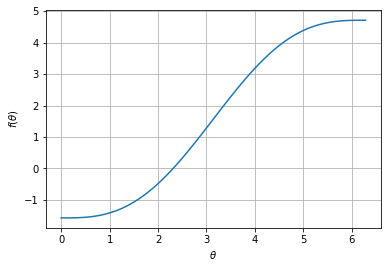

In [12]:
df=pd.DataFrame({"theta" : theta,"f_theta" : f(theta)})
plt.figure()
plt.plot(df.theta.values, df.f_theta.values)
plt.xlabel("$\\theta$")
plt.ylabel("$f(\\theta)$")
plt.grid()
plt.show()

In [17]:
#Bisection 
BM=optimize.bisect(f,0,np.pi,xtol=1E-12)

#Fixed Point
FP=optimize.fixed_point(f_fp,np.pi,xtol=1E-5,maxiter=n)

#Newton Secant
NS=optimize.newton(f, np.pi, maxiter=n, tol=1E-5)

#Newton Raphson
NR=optimize.newton(f, np.pi, fprime=d_f, maxiter=n, tol=1E-5)

print(f'Bisection Method: {BM} \nFixed_Point: {FP} \nSecant Method: {NS} \nNewton - Raphson: {NR}')

e1=abs(BM-FP)
e2=abs(NS-NR)
print(f'''\n \nFor n=1000 iterations, the error in the root:
for Bisection & Fixed Point Method, exist an error the order of {e1}, \nSimilarly in the case of Newton- Raphson and Secant Methods
the relative error is {e2}''')



Bisection Method: 2.3098814600094557 
Fixed_Point: 2.309881460009962 
Secant Method: 2.309881460010702 
Newton - Raphson: 2.309881460010058

 
For n=1000 iterations, the error in the root:
for Bisection & Fixed Point Method, exist an error the order of 5.062616992290714e-13, 
Similarly in the case of Newton- Raphson and Secant Methods
the relative error is 6.439293542825908e-13


---------------------------
**R/:** El angulo para que se cumpla la condición es $\theta \approx 2.3098814600 \ rad$

___________________________________________________________________________

##**3.)**


![Imagen 3](https://raw.githubusercontent.com/jerolg/Metodos_Computacionales_taller/main/book/images/ecuacion_1_variable/Fig2.png)

 Resolver la siguiente situación

En el diseño de los vehiculos para todo tipo de terreno,  es necesario tener encuentra fallas cuando se trata de liberar dos tipos de obstáculos. Una es la falla por rozamiento, y ocurre cuando el vehiculo 
intenta cruzar un obstáculo que hace que su fondo toque el suelo. La otra recibie el nombre de falla por colision de la defensa delantera y ocurre cuando el vehiculo desciende por una zanja y la defensa delantera toca el suelo.



La figura muestra las componentes asociados al segundo tipo  de falla. En ella se indeca el ángulo máximo $\alpha$ que puede alcanzar un vehiculo cuando $\beta$ es el angulo maximo en que no ocurre la falla 
por rozamiento y satisface la siguiente ecuación: 


\begin{equation}
A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha)=0
\end{equation}

donde; 
\begin{equation}
A = l \sin(\beta)
\end{equation}

\begin{equation}
B = l \cos(\beta)
\end{equation}
\begin{equation}
C = (h + 0.5 D )\sin(\beta) - 0.5 D \tan(\beta)
\end{equation}

\begin{equation}
E = (h + 0.5 D ) \cos(\beta) - 0.5 * D
\end{equation}


Para $l=89$pulg, $h=49$pul, $D=55$, $\beta=11.5° \rightarrow 0.2007 \ rad$ , el angulo se aproximara a $33° \rightarrow 0.576 \ rad$. Verificar este resultados

In [55]:
def init_params(l=89,h=49,D=55,b=0.2007):
  A=l * np.sin(b)
  B=l * np.cos(b)
  C=(h + 0.5 * D) * np.sin(b) - 0.5 * D * np.tan(b)
  E=(h + 0.5 * D) * np.cos(b) - 0.5 * D
  return A, B, C, E

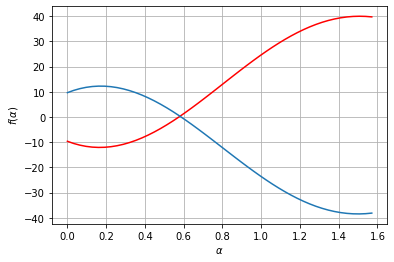

In [63]:
A, B, C, E=init_params()
def f(a):
  T1=A * np.sin(a) * np.cos(a)
  T2=B * np.sin(a)**2
  T3=- C * np.cos(a) - E * np.sin(a)
  return T1+T2+T3

a = np.linspace(0,np.pi/2)

plt.plot(a, f(a),color='r')
plt.plot(a,a-f(a))
plt.xlabel('$α$')
plt.ylabel('$f(α)$')
plt.grid()
plt.show()

In [71]:
r=lambda x : x-f(x)
d_f = lambda x : -E * np.cos(x) + A * (np.cos(x))**2 + C * np.sin(x) + 2*B * np.cos(x) * np.sin(x) - A * (np.sin(x))**2

n=1000

#Bisection 
BM=optimize.bisect(f,0.4,0.6,xtol=1E-5,maxiter=n)

#Fixed Point
FP=optimize.fixed_point(f,0.1,xtol=1E-5,maxiter=n)

#Newton Secant
NS=optimize.newton(f, 0.6, maxiter=n, tol=1E-5)

#Newton Raphson
NR=optimize.newton(f, 0.6, fprime=d_f, maxiter=n, tol=1E-5)

print(f'Bisection Method: {BM} \nFixed_Point: {FP} \nSecant Method: {NS} \nNewton - Raphson: {NR}')

e1=abs(BM-FP)
e2=abs(NS-NR)
print(f'''\n \nFor n=1000 iterations, the error in the root:
for Bisection & Fixed Point Method, exist an error the order of {e1}, \nSimilarly in the case of Newton- Raphson and Secant Methods
the relative error is {e2}''')

Bisection Method: 0.575469970703125 
Fixed_Point: 18.42958142614522 
Secant Method: 0.5754739974665111 
Newton - Raphson: 0.5754739958541356

 
For n=1000 iterations, the error in the root:
for Bisection & Fixed Point Method, exist an error the order of 17.854111455442094, 
Similarly in the case of Newton- Raphson and Secant Methods
the relative error is 1.6123754553731828e-09


En este caso particular el metodo de punto fijo resulta ineficaz e incorrecto usarlo, ya que tenemos una función periodica con n raices, y el acercamiento no necesariamente se da hacia el punto raiz que queremos obtener.

- - - - - - - - - - - - - - - - 
**R/:** El angulo máximo $\alpha_{max}$ es $0.5754 \ rad \rightarrow 32.968°$, lo cual concuerda con el postulado anterior.
______________________________________________________________________

##**4.)**##
Construir un fractal empleando el metodo de Newton-Raphson, 
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)} 
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}

In [72]:
from PIL import Image

In [73]:
Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

In [74]:
#Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h

In [75]:
a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break 
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )

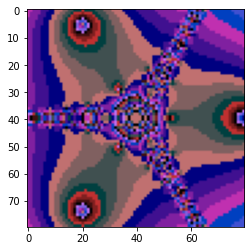

In [79]:
plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
plt.show()